# WIP

ADRIO v2 demo use-case

In [1]:
import numpy as np

import epymorph.geo.adrio.acs5 as acs5
import epymorph.geo.adrio.adrio2 as adrio
import epymorph.geo.adrio.us_tiger as tiger
from epymorph import *
from epymorph.geography.us_census import StateScope
from epymorph.simulator.data import evaluate_param

# Look ma, no geo!

rume = Rume.single_strata(
    ipm=ipm_library['sirs'](),
    mm=mm_library['centroids'](),
    init=init.SingleLocation(location=0, seed_size=10_000),
    scope=StateScope.in_states_by_code([
        'AZ', 'CO', 'NM', 'UT', 'NV', 'CA', 'OR', 'WA',
    ], year=2020),
    time_frame=TimeFrame.of("2015-01-01", 300),
    params={
        'ipm::beta': 0.4,
        'ipm::gamma': 1 / 5,
        'ipm::xi': 1 / 90,
        'mm::phi': 40.0,
        'population': acs5.Population(),
        'centroid': tiger.InternalPoint(),

        # Realistically, if I needed populations by age group, I would have a multistrata RUME,
        # but this is just for demonstrating these ADRIOs work...
        'population_by_age_table': acs5.PopulationByAgeTable(),
        'population_00-19': acs5.PopulationByAge(0, 19),
        'population_20-59': acs5.PopulationByAge(20, 59),
        'population_60-79': acs5.PopulationByAge(60, 79),
        'geo::label': tiger.Name(),

        # Example: I can use a different definition of centroid!
        # '*::centroid': tiger.GeometricCentroid(),

        # Example: I can calculate pop density (persons per km^2) by combining ADRIOs...
        # 1. get land area in m^2 from TIGER
        # 2. scale that to be in km^2
        # 3. use a generic pop density ADRIO which combines 'population' and 'land_area_km2'
        # '*::land_area_km2': adrio.Scale(tiger.LandAreaM2(), factor=1e-6),
        # '*::population_km2': adrio.PopulationPerKm2(),
    },
)

In [2]:
p1 = evaluate_param(rume, 'population_00-19')
p2 = evaluate_param(rume, 'population_20-59')
p3 = evaluate_param(rume, 'population_60-79')

display(p1)
display(p2)
display(p3)

Evaluating PopulationByAgeTable ADRIO...
Completed PopulationByAgeTable ADRIO (25.067s).
Evaluating PopulationByAge ADRIO...
Completed PopulationByAge ADRIO (0.001s).
Evaluating PopulationByAge ADRIO...
Completed PopulationByAge ADRIO (0.000s).
Evaluating PopulationByAge ADRIO...
Completed PopulationByAge ADRIO (0.000s).


array([1836857, 9986244, 1405688,  753880,  539036,  965716, 1022625,
       1830822])

array([ 3647013, 21461094,  3134038,  1619922,  1057305,  2197901,
        1633858,  4046677])

array([1398221, 6476190,  968900,  560741,  416069,  847429,  415591,
       1372944])

Evaluating Population ADRIO...
Completed Population ADRIO (0.591s).
Evaluating InternalPoint ADRIO...
Completed InternalPoint ADRIO (0.154s).
Evaluating Name ADRIO...
Completed Name ADRIO (0.099s).
Running simulation (BasicSimulator):
• 2015-01-01 to 2015-10-28 (300 days)
• 8 geo nodes
|####################| 100% 
Runtime: 0.587s


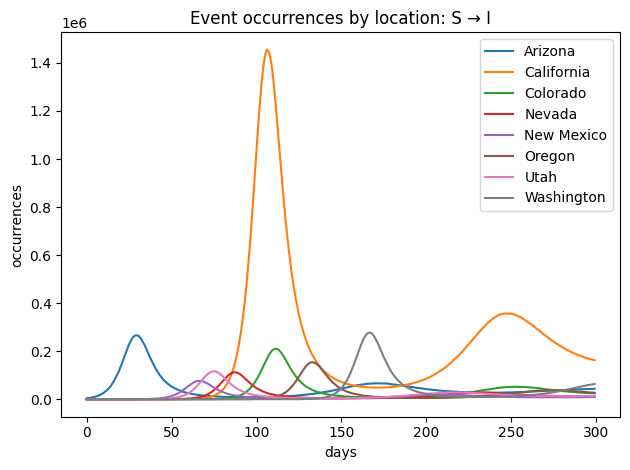

In [3]:
sim = BasicSimulator(rume)
with sim_messaging(sim):
    out = sim.run()

plot_event(out, event_idx=rume.ipm.event_by_name("S->I"))